Training model with relu activation and SGD optimizer...
Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5775 - loss: 1.2238 - val_accuracy: 0.9498 - val_loss: 0.1677
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9171 - loss: 0.2711 - val_accuracy: 0.9660 - val_loss: 0.1111
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9379 - loss: 0.2054 - val_accuracy: 0.9683 - val_loss: 0.1002
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9466 - loss: 0.1752 - val_accuracy: 0.9722 - val_loss: 0.0841
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9535 - loss: 0.1544 - val_accuracy: 0.9749 - val_loss: 0.0779
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9569 - loss: 0.1461 - val_accuracy: 0.9785 - val_loss: 0.0683
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9594 - loss: 0.1309 - val_accuracy: 0.9800 - val_loss: 0.0628
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/

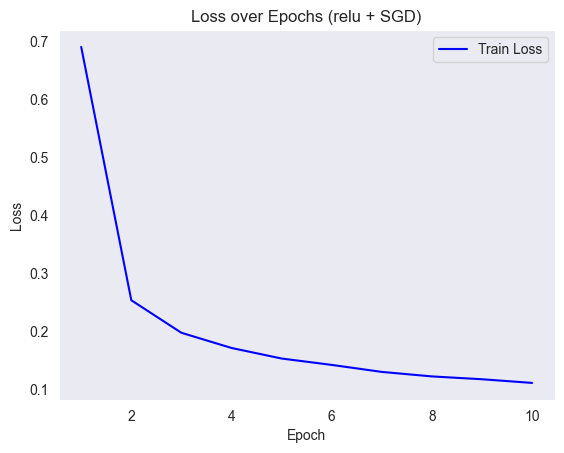

Test Accuracy with relu activation and SGD optimizer:  0.98


In [3]:
# Basic Python Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# TensorFlow & Keras Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam

warnings.filterwarnings("ignore")
%matplotlib inline

# Data Preparation
# Train and Test Splits
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = tf.keras.datasets.mnist.load_data()

# Reshape images to include channel dimension
X_train_images = X_train_images.reshape([-1, 28, 28, 1]).astype("float32")
X_test_images = X_test_images.reshape([-1, 28, 28, 1]).astype("float32")

# Normalization
X_train_images = X_train_images / 255.0
X_test_images = X_test_images / 255.0

# Target Class Labels into Dummy Variables
y_train_labels = tf.keras.utils.to_categorical(y_train_labels, 10)
y_test_labels = tf.keras.utils.to_categorical(y_test_labels, 10)

# Build CNN Model
def build_model(activation, initializer):
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(3, 3), activation=activation, input_shape=(28, 28, 1), kernel_initializer=initializer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(5, kernel_size=(3, 3), activation=activation, kernel_initializer=initializer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation=activation, kernel_initializer=initializer))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax", kernel_initializer=initializer))
    return model

# Train and Evaluate Model
def train_and_evaluate(activation, optimizer_class, learning_rate, initializer, 
                        X_train_images, y_train_labels,
                        X_test_images, y_test_labels,
                        num_epochs):
    model = build_model(activation, initializer)
    optimizer = optimizer_class(learning_rate=learning_rate, clipnorm=1.0)  # Using gradient clipping with norm
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train_images, y_train_labels, 
                        epochs=num_epochs, batch_size=100, 
                        validation_data=(X_test_images, y_test_labels), 
                        verbose=1)
    test_loss, test_accuracy = model.evaluate(X_test_images, y_test_labels, verbose=0)
    return model, history.history["loss"], test_accuracy
    
# Plots Loss over Epochs    
def plot_loss(num_epochs, losses, title):
    sns.set_style("dark")
    plt.plot(range(1, num_epochs + 1), losses, "b", label="Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.show()

# Model Hyperparameters    
num_epochs = 10
activations = ["relu"]
optimizer_specs = {
    "SGD": (SGD, 0.05)
}

# Execute Training
for activation in activations:
    for opt_name, (optimizer_class, learning_rate) in optimizer_specs.items():
        if activation == "relu":
            initializer = tf.keras.initializers.HeNormal()
        else:
            initializer = tf.keras.initializers.GlorotNormal()

        print(f"Training model with {activation} activation and {opt_name} optimizer...")
        model, losses, test_accuracy = train_and_evaluate(activation, 
                                                    optimizer_class, 
                                                    learning_rate, 
                                                    initializer,
                                                    X_train_images, y_train_labels,
                                                    X_test_images, y_test_labels,
                                                    num_epochs)
        plot_loss(num_epochs, losses, f"Loss over Epochs ({activation} + {opt_name})")
        print(f"Test Accuracy with {activation} activation and {opt_name} optimizer: {test_accuracy: .2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


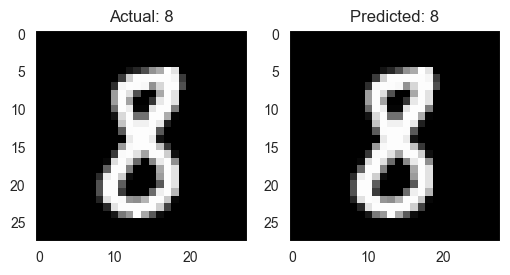

In [4]:
# Test Prediction for One Image
index = np.random.randint(0, X_test_images.shape[0])
test_image = X_test_images[index]
true_label = np.argmax(y_test_labels[index])

# Add batch dimension (1, 28, 28, 1)
test_image_batch = np.expand_dims(test_image, axis=0)

# Make prediction
prediction = model.predict(test_image_batch)
predicted_label = np.argmax(prediction)

# Plot actual image vs predicted label
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(test_image.squeeze(), cmap="gray")
plt.title(f"Actual: {true_label}")

plt.subplot(1, 2, 2)
plt.imshow(test_image.squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_label}")

plt.show()